# Tutorial 2

## Outline
* random numbers
* pandas
* Simulated Annealing
* Q&A on HW#1


## Random Numbers

In [1]:
import numpy as np

Generate a random integer

In [24]:
np.random.randint(1,10)

9

Generate a vector of 10 random numbers

In [25]:
np.random.random(10)

array([0.15939161, 0.53885199, 0.10376712, 0.35692723, 0.17321031,
       0.28031118, 0.14167554, 0.44902223, 0.99244022, 0.3647907 ])

In [26]:
np.random.random((2,3))

array([[0.29582578, 0.19561057, 0.96743746],
       [0.21554862, 0.19946986, 0.96924764]])

In [28]:
np.random.random(10) * 2 - 1
# ranging from -1 to 1

array([-0.93919016, -0.64418556, -0.49637366, -0.94897802,  0.59885186,
       -0.43240041, -0.74217922,  0.28275548,  0.89477359,  0.90444118])

Generate a 3d vector with norm of 5

In [29]:
r = np.random.random(3) * 2 - 1
r / np.linalg.norm(r)

array([ 0.29103611,  0.95355711, -0.07763262])

More on using numpy.random (https://numpy.org/doc/stable/reference/random/index.html)

## Pandas and operations on dataset

Read in a .csv file <br>
Use the famous wines.csv dataset (provided on bcourse)

In [34]:
import pandas as pd


df=pd.read_csv('./../HW#2/wines.csv')


In [36]:
df.head()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1


I want to drop the last two columns and keep only the chemical descriptors

In [ ]:
features = df.drop()

Computing min,max and average for a specific chemical descriptor

In [38]:
proline_max = np.max(df['Proline'])
proline_min = np.min(df['Proline'])
proline_mean = np.mean(df['Proline'])


print(proline_max, "|", proline_min, "|", proline_mean)

1680 | 278 | 746.8932584269663


Find the index with largest Ash

In [39]:
np.argmax(df['Ash'])

154

Find entry by index in a DataFrame

Find a subset of data that have Start assignment of 1

## Simulated annealing

Try to find the global minimum of the three-hump Camel function using simulated annealing

Three-Hump Camel function
$f(x,y)=2x^2-1.05x^4+x^6/6+xy+y^2$

In [40]:
from pylab import *
from mpl_toolkits.mplot3d import axes3d

In [41]:
def Camel(X):
    x,y=X
    return 2*x**2-1.05*x**4+x**6/6+x*y+y**2



In [44]:
def plot_surface(func,x_min=-2,x_max=2,y_min=-2,y_max=2):
    a=np.linspace(x_min,x_max,100)
    b=np.linspace(y_min,y_max,100)
    x,y=np.meshgrid(a,b)
    z=func((x,y))
    fig=plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.view()
    ax.plot_surface(x,y,z)

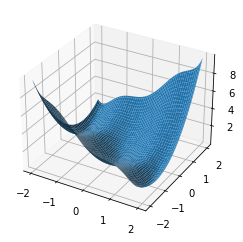

In [45]:
plot_surface(Camel)

In [46]:
def SA(solution,cooling_schedule):
    best_solution=solution.copy()
    lowest_eval=Camel(best_solution)
    for idx,temp in enumerate(cooling_schedule):
        if idx%500==0:
            print("%d/%d   temp:%f"%(idx,len(cooling_schedule),temp))
        for n in range(len(solution)):
            trial = solution.copy()
            trial[n] = (np.random.random() * 2 -1) * 0.1
            if trial[n] >= -2 and trial[n] <= 2:
                if np.exp(-(Camel(trial) - Camel(solution)) / temp) > np.random.random():
                    solution = trial.copy()
                    if Camel(solution) < lowest_eval:
                        lowest_eval = Camel(solution)
                        best_solution = solution
    return {"solution":best_solution,"evaluation":lowest_eval}

Try linear cooling first

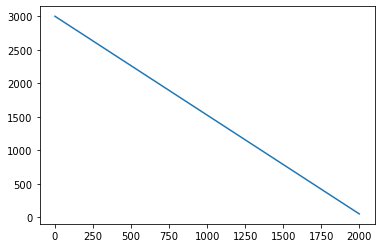

In [48]:
linear_cooling = np.linspace(3000,50,2000)
plt.plot(linear_cooling)

In [53]:
SA([10,10],linear_cooling)

0/2000   temp:3000.000000
500/2000   temp:2262.131066
1000/2000   temp:1524.262131
1500/2000   temp:786.393197


{'solution': [-0.0006283237043884561, -0.0026677901641656955],
 'evaluation': 9.582921349839117e-06}

Create a schedule of heating and cooling

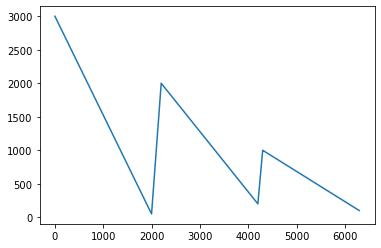

In [49]:
schedule=np.append(linear_cooling,np.linspace(linear_cooling[-1],2000,200))
schedule=np.append(schedule,np.linspace(schedule[-1],200,2000))
schedule=np.append(schedule,np.linspace(schedule[-1],1000,100))
schedule=np.append(schedule,np.linspace(schedule[-1],100,2000))
plt.figure()
plt.plot(schedule)

In [54]:
SA([10,10],schedule)

0/6300   temp:3000.000000
500/6300   temp:2262.131066
1000/6300   temp:1524.262131
1500/6300   temp:786.393197
2000/6300   temp:50.000000
2500/6300   temp:1729.864932
3000/6300   temp:1279.639820
3500/6300   temp:829.414707
4000/6300   temp:379.189595
4500/6300   temp:909.954977
5000/6300   temp:684.842421
5500/6300   temp:459.729865
6000/6300   temp:234.617309


{'solution': [9.56953705627539e-05, 0.0001554842319266614],
 'evaluation': 5.7369675374941645e-08}

## HW#1 Discussion